# Using Tensorflow to predict feature_2
I have used neural networks to predict feature_2. 
* The program starts by Importing all the necessary libraries that I have used in this program. 
* In second step I have done visulaisation and explorarion of data by using head() function and graphs
* Next step is preprocessing where I have used minmaxscaler on train set to scale the feature_1 so that it can give better output
* Last step is building the model and then training it
* Finally I tested the model on test set and saved the predictions in submission.csv file


# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras


In [2]:
Random_seed = 42
np.random.seed(Random_seed)
tf.random.set_seed(Random_seed)

# Reading the train and test file
train.csv file has been read into df and test.csv file has been read into df_test. I have used time column as an index in df.

In [3]:
df = pd.read_csv('../input/into-the-future/train.csv',index_col = [1],parse_dates = [1])
df_test = pd.read_csv('../input/into-the-future/test.csv',index_col = [1],parse_dates = [1])

# Visualization and Exploration
Checking the features and data types in df and df_test dataset

In [4]:
df = df.drop(['id'],axis = 1)
df.dtypes

feature_1    float64
feature_2    float64
dtype: object

In [5]:
test = df_test
test.dtypes

id             int64
feature_1    float64
dtype: object

Checking if the test dataset contains any null value

In [6]:
df.isnull().values.any()

False

Taking a insight of df dataset using head()

In [7]:
df.head()


,feature_1,feature_2
time,,
2019-03-19 00:00:00,735.740043,54479.540513
2019-03-19 00:00:10,734.102947,47888.033714
2019-03-19 00:00:20,730.060336,47700.882325
2019-03-19 00:00:30,725.609742,47790.094648
2019-03-19 00:00:40,724.328480,47808.402381


Lets take a look at the statistical values of the df data set using describe() function

In [8]:
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['second'] = df.index.second
df.describe()


,feature_1,feature_2,hour,minute,second
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,523.754885,52487.426941,0.361702,24.797872,25.000000
std,70.507377,1582.206650,0.480920,16.301498,17.093412
min,420.127639,47700.882325,0.000000,0.000000,0.000000
25%,474.970260,51842.916087,0.000000,11.000000,10.000000
50%,501.204656,53170.608346,0.000000,23.000000,25.000000
75%,569.862105,53515.111143,1.000000,36.000000,40.000000
max,735.740043,54479.540513,1.000000,59.000000,50.000000


Graphs are very usefull as they give lot of information about the data set. I have plotted a graph between feature_2 and time. As we can see from this graph that it has an outlier value in the beginning.

In [9]:
test['hour'] = test.index.hour
test['minute'] = test.index.minute
test['second'] = test.index.second
test.describe()

,id,feature_1,hour,minute,second
count,375.000000,375.000000,375.000000,375.000000,375.000000
mean,751.000000,409.334539,1.584000,29.712000,24.880000
std,108.397417,28.841608,0.493552,17.023332,17.100646
min,564.000000,364.045118,1.000000,0.000000,0.000000
25%,657.500000,383.701342,1.000000,15.000000,10.000000
50%,751.000000,401.488841,2.000000,31.000000,20.000000
75%,844.500000,432.481531,2.000000,44.000000,40.000000
max,938.000000,466.892616,2.000000,59.000000,50.000000


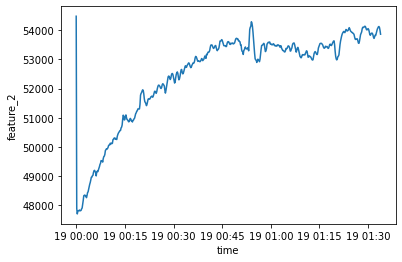

In [10]:
sns.lineplot(x=df.index,y='feature_2',data =df)
sns.set(rc={'figure.figsize':(12,8)})

The second graph is plotted between feature_1 and time and it has no outlier

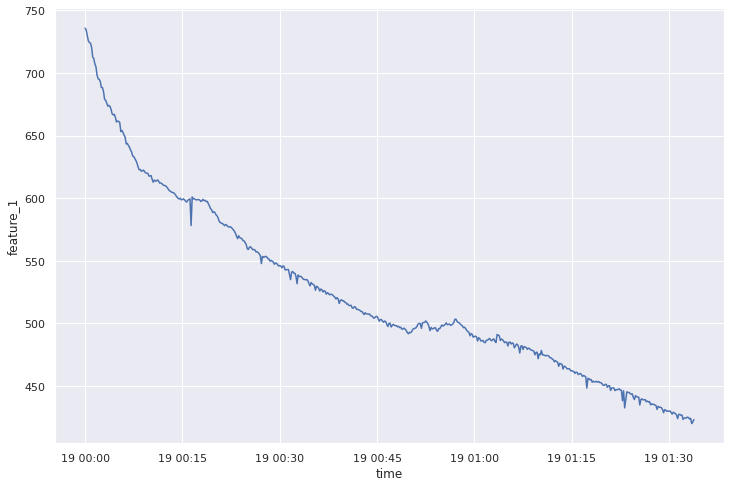

In [11]:
sns.lineplot(x=df.index,y='feature_1',data =df)
sns.set(rc={'figure.figsize':(12,8)})

Removing the outlier by removing the first row from df dataset

In [12]:
#df = df.iloc[1:]

In [13]:
df.head()

,feature_1,feature_2,hour,minute,second
time,,,,,
2019-03-19 00:00:00,735.740043,54479.540513,0,0,0
2019-03-19 00:00:10,734.102947,47888.033714,0,0,10
2019-03-19 00:00:20,730.060336,47700.882325,0,0,20
2019-03-19 00:00:30,725.609742,47790.094648,0,0,30
2019-03-19 00:00:40,724.328480,47808.402381,0,0,40


In [14]:
train = df
train_size = len(df)
test_size = len(test)

print(len(train), len(test))

564 375


# Preprocessing 
The first step of preprocessing is normalising  the features in the data set. Here I have used MinMaxScalar to normalize so that all the values lie between 0 and 1.


In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(train[['feature_1']].to_numpy())

MinMaxScaler()

In [17]:
scaled_train_f1 = scaler.transform(train[['feature_1']].to_numpy())
scaled_test_f1 = scaler.transform(test[['feature_1']].to_numpy())

second_square = np.square(train[['second']])
test_second_square = np.square(test[['second']])

train_feature = np.c_[scaled_train_f1,train[['hour']],train[['minute']],train[['second']]]
test_feature = np.c_[scaled_test_f1,test[['hour']],test[['minute']],test[['second']]]


In [18]:
scaler.fit(train[['feature_2']].to_numpy())
scaled_train_f2 = scaler.transform(train[['feature_2']].to_numpy())

# Building the model
The first step is to specify the architecture of the model. I have used keras sequential model for this.

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(4,)),
    keras.layers.Dense(120, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(120, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(120, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.01)),
])

**Configuring the model**

In [20]:
model.compile(optimizer='adam',
              loss='mse'
              )

# Training the model 
The first step is fitting the parameters to the data using fit()

In [21]:
hist = model.fit(train_feature, scaled_train_f2, shuffle=False,
          batch_size=1, 
                 epochs=10,validation_split=0.1)

Epoch 1/10
507/507 [==============================] - 1s 2ms/step - loss: 0.3167 - val_loss: 0.0208
Epoch 2/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0288 - val_loss: 0.0120
Epoch 3/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0285 - val_loss: 0.0142
Epoch 4/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0271 - val_loss: 0.0137
Epoch 5/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0246 - val_loss: 0.0116
Epoch 6/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0282 - val_loss: 0.0113
Epoch 7/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0272 - val_loss: 0.0098
Epoch 8/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0277 - val_loss: 0.0090
Epoch 9/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0270 - val_loss: 0.0087
Epoch 10/10
507/507 [==============================] - 1s 1ms/step - loss: 0.0262 - val_loss: 0.0081

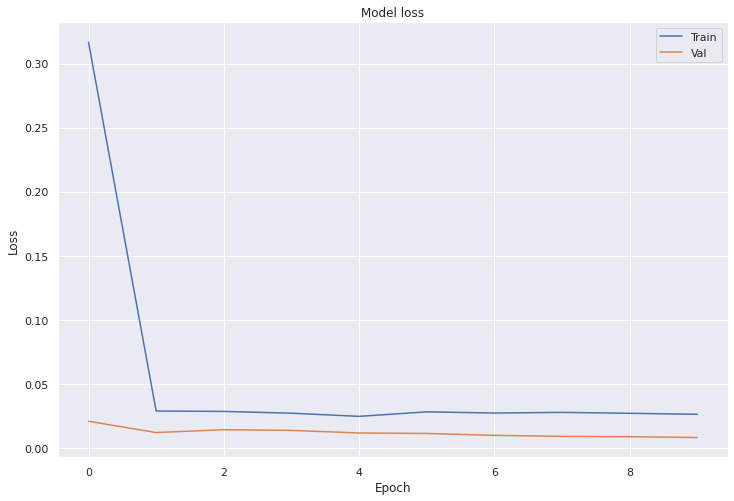

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Predicting
Once the training is done, we will predict the values for our test set using predict()

In [23]:
prediction = model.predict(test_feature)

In [24]:
prediction.shape

(375, 1)

**Since we transformed our data by normalising it, we have to inverse transform our data to get the values which we want.**

In [25]:
feature_2 = scaler.inverse_transform(prediction)

In [26]:
ids = test[['id']].to_numpy()
ids = ids.flatten()

feature_2 = feature_2.flatten()


**Saving the data into .csv file**

In [27]:
d = {'id': ids, 'feature_2': feature_2}
submission = pd.DataFrame(data = d)
submission.to_csv('submission.csv',index=False)

In [28]:
submission

,id,feature_2
0,564,53930.171875
1,565,53947.847656
2,566,53965.015625
3,567,53981.695312
4,568,53997.894531
...,...,...
370,934,54002.136719
371,935,54017.730469
372,936,53938.824219
373,937,53956.246094
